## Interpolacion con circulos

Hacemos los imports necesarios

In [113]:
import numpy as np
import matplotlib.pyplot as plt

### Buscamos el cenith

Para ello usamo la función de detección de circulos la cuál
fue alimentada con distintos slices de la interpolación
lineal hecha con anterioridad.
>imágenes en "chacana\Matriz de pixeles\circles_detector\circles 1\\"

In [114]:
from circles_detector.class_circle_detector import circle_detector

In [115]:
detection = circle_detector()
x_center = detection.detections_mean[1]
y_center =  detection.detections_mean[0]


Iniciando Detector de Circulos...
buscando en imagenes en:
 "D:\Karlos\Universidad\Investigación\chacana\Matriz de pixeles\circles_detector\circles\"
...centro promedio en
	x=726.9333333333333, y=478.6666666666667
...con desviacion estandar:
	x_err=4.373658524495126, y_err=3.9777157040470117


este es el centro promedio que utilizaremos

### Pixeles según un radio

Cargamos los datos experimentales

In [103]:
from class_pixeltable import PixelTable

In [104]:
table = PixelTable(data_path = "Data.pixtab")

Reducimos un poco la tabla para optimizar recursos

In [105]:
X_MIN, X_MAX, Y_MIN, Y_MAX = 300, 1500, 0, 900
query_str = "{}<=x<={} and {}<=y<={}".format(X_MIN, X_MAX, Y_MIN, Y_MAX)
data = table.df.dropna(thresh = 7).query(query_str)
# data

Ahora filtramos los pixeles que se encuentren en un
sierto radio (157) al rededor del cenith

In [106]:
radio = 157
query = "{}//0.1*10 == ((x-{})**2 + (y-{})**2)**(1/2)//0.1*10"
df_circle = data.query(query.format(radio, x_center, y_center)).dropna()
# df_circle

Graficamos la altura (eje Y) de los pixeles filtrados, esperamos que por simetria azimutal la altura sea 
la misma para todos los pixeles

59.26431478945077

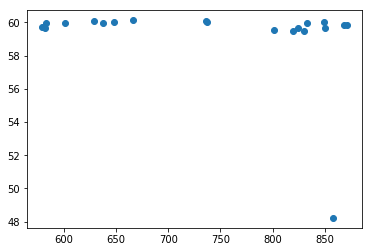

In [108]:
plt.scatter(df_circle.x, df_circle.alt)
np.mean(df_circle.alt.values)

Vemos que la altura cumple con sierto comportamiento constante exceptuando
por algunos pixeles *outlayers*.

### Descartamos pixeles *outlayers*

Para ello utilizaremos el método z-score de la función stats de la librería scipy

In [109]:
from scipy import stats

Este método arroja una puntuación que es mayor mientras más se aleja
del valor medio.
Elegimos puntuaciones menores a 1 como threshold

In [116]:
z = stats.zscore(df_circle.alt.values)
indx = np.where(np.abs(z) < 1) 

Volvemos a graficar la altura para ver resultados

59.84453214188941

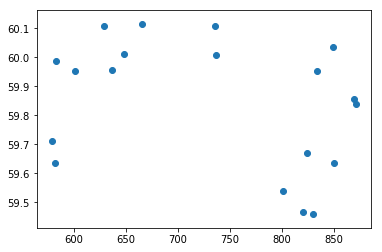

In [117]:
plt.scatter(df_circle.x.values[indx], df_circle.alt.values[indx])
alt_mean = np.mean(df_circle.alt.values[indx])
alt_mean

Como vemos se han descartado los pixeles con valores atípicos

### Interpolación

Por último interpolamos las alturas asignando la altura promedio a todos los pixeles en ese radio. Cumpliendo así con la simetria azimutal

d:\programas\directorios\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


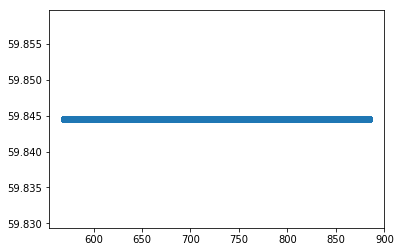

In [118]:
new_pixels = []
theta_range = np.linspace(0, 2*np.pi, 2*np.pi * radio)
for theta in theta_range:
    new_pixels.append([x_center + radio*np.cos(theta),
                        y_center + radio*np.sin(theta),
                                                alt_mean, theta])
new_pixels = np.array(new_pixels)
plt.scatter(new_pixels[:,0], new_pixels[:,2])